In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [6]:
df = pd.read_csv(r'C:\Users\pedro\Desktop\Data Science\Machine Learning\Regresion linear\Boston_Housing_from_Sklearn.csv')

1) Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis de estas tres características.

<AxesSubplot:>

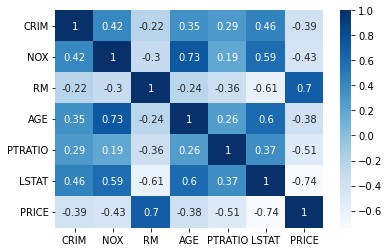

In [7]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

Las caracteristicas que tienen un coeficiente de correlaciòn de magnitud de 0,5 son el 'PTRATIO' 'LSTAT'

2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).

3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!

In [8]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.

In [9]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [10]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [11]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [12]:
from sklearn.compose import make_column_transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [13]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000273A8E0DB38>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000273A8E0DFD0>)])

5) Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Make a linear regression instance
reg = LinearRegression()


In [16]:
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.6954015699310794


In [18]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.6356314088765053


6) Evalúen el modelo usando el error absoluto medio (EAM).

In [19]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test)

In [20]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [22]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

In [23]:
mae_test

3.33574273728613

In [24]:
mae_train

3.6696193784155042

7) Evalúen el modelo usando el error cuadrático medio (ECM). 

In [25]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

In [26]:
mse_test

25.515691673715235

In [27]:
mse_train

27.01231620258666

8) Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.  

In [28]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [29]:
rmse_test

5.051305937449763

In [30]:
rmse_train

5.197337414733304

Ejercicio básico de conjunto de árboles

1) Bagged trees

In [31]:
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

In [32]:
bagreg = BaggingRegressor(random_state = 42)

In [33]:
# Miren a los hiperparámetros
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [34]:
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [35]:
bagreg.predict(X_test)

array([24.04, 30.77, 18.39, 24.04, 16.09, 20.4 , 19.13, 15.03, 21.07,
       21.39, 18.87, 19.46,  7.68, 19.44, 18.93, 25.27, 19.06,  7.87,
       44.92, 14.98, 24.01, 23.58, 14.26, 24.63, 14.15, 12.82, 20.67,
       14.2 , 19.37, 20.33, 20.6 , 23.18, 31.23, 21.4 , 13.94, 15.81,
       36.2 , 19.6 , 20.22, 24.6 , 18.88, 25.75, 44.15, 20.44, 22.72,
       14.5 , 14.95, 24.43, 16.76, 28.32, 22.93, 34.44, 15.92, 25.6 ,
       47.42, 22.56, 15.93, 31.44, 21.34, 20.25, 27.03, 33.4 , 27.06,
       19.23, 28.11, 16.18, 14.58, 22.82, 28.31, 16.5 , 19.59, 25.86,
        9.79, 21.71, 21.47,  6.94, 20.52, 46.12, 11.9 , 14.74, 20.45,
       11.14, 20.37,  9.44, 20.4 , 26.58, 16.95, 23.41, 24.52, 17.98,
       23.  ,  7.34, 18.97, 20.09, 26.26, 20.12, 35.89, 11.42, 12.12,
       12.27, 20.1 , 23.  , 11.72, 23.22, 20.29, 15.51, 18.07, 25.05,
       21.62, 23.58,  7.73, 14.05, 21.61, 22.51, 33.87, 12.38, 43.51,
       16.17, 18.67, 24.28, 20.11, 24.72,  8.68, 20.84, 24.5 , 21.74,
       24.2 ])

In [36]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


2) Regresión de bosque aleatorio

Paso 1: importar el modelo que quieran usar

In [37]:
# Importen un regresor de bosque aleatorio
from sklearn.ensemble import RandomForestRegressor

Paso 2: hacer una instancia del modelo

In [38]:
rf = RandomForestRegressor(random_state = 42)

In [39]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Paso 3: entrenar el modelo en los datos, almacenando la información aprendida de los datos.

In [40]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Paso 4: predecir los valores para y (recuerden que este paso permite ver las predicciones reales, pero no es necesario para evaluar o afinar el modelo).

In [41]:
rf.predict(X_test)

array([22.986, 31.391, 19.003, 23.141, 16.213, 20.666, 18.768, 15.219,
       21.251, 20.809, 20.253, 20.247,  8.237, 21.228, 19.717, 26.426,
       19.432,  8.497, 46.203, 15.325, 23.637, 23.557, 14.31 , 24.344,
       15.369, 13.575, 21.195, 13.96 , 18.668, 21.416, 19.64 , 23.35 ,
       28.457, 21.533, 14.143, 16.065, 34.532, 19.198, 20.46 , 23.926,
       18.542, 28.025, 45.118, 19.994, 22.885, 14.364, 15.116, 23.797,
       17.815, 28.089, 21.717, 34.018, 16.448, 25.876, 44.673, 21.957,
       16.028, 31.978, 21.921, 20.542, 26.234, 33.55 , 30.222, 19.88 ,
       27.288, 16.302, 14.934, 22.961, 27.268, 17.147, 20.538, 30.51 ,
       10.187, 21.264, 21.262,  7.225, 20.097, 46.97 , 12.082, 13.522,
       22.008, 12.609, 20.435,  8.976, 20.58 , 27.007, 16.026, 23.329,
       24.346, 17.787, 22.135,  7.881, 18.524, 20.042, 25.241, 19.298,
       32.793, 13.215, 12.961, 12.98 , 19.742, 24.277, 13.176, 20.387,
       21.179, 14.004, 19.233, 24.822, 20.402, 24.114,  9.165, 14.91 ,
      

Paso 5: evaluar el rendimiento del modelo

In [42]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


Ajustar max_depth

In [44]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    rf = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

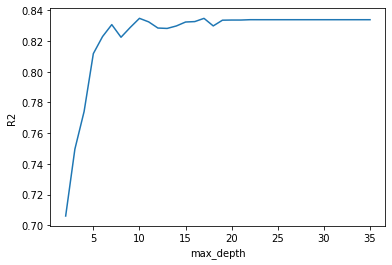

In [45]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [46]:
rf_10 = RandomForestRegressor(max_depth = 10, random_state = 42)
rf_10.fit(X_train, y_train)
rf_10_train_score = rf_10.score(X_train, y_train)
rf_10_test_score = rf_10.score(X_test, y_test)
print(rf_10_train_score)
print(rf_10_test_score)

0.9739265386241982
0.834746736666161


In [47]:
#Para ver cuál era la profundidad de cada árbol en el bosque aleatorio cuando el max_depth era ilimitado, pueden usar el siguiente código:
[estimator.get_depth() for estimator in rf.estimators_]

[19,
 17,
 18,
 18,
 17,
 17,
 19,
 17,
 16,
 17,
 19,
 18,
 18,
 16,
 17,
 18,
 19,
 17,
 20,
 17,
 17,
 18,
 16,
 17,
 18,
 18,
 19,
 17,
 23,
 17,
 18,
 17,
 15,
 18,
 18,
 17,
 20,
 15,
 18,
 15,
 17,
 16,
 17,
 16,
 15,
 16,
 16,
 16,
 16,
 18,
 20,
 18,
 17,
 18,
 19,
 17,
 20,
 17,
 16,
 20,
 19,
 17,
 18,
 17,
 14,
 20,
 15,
 14,
 20,
 17,
 20,
 16,
 15,
 18,
 18,
 16,
 16,
 19,
 15,
 17,
 16,
 17,
 18,
 18,
 20,
 22,
 17,
 21,
 16,
 14,
 16,
 16,
 20,
 19,
 16,
 17,
 20,
 19,
 17,
 17]

Afinar n_estimators (# de los árboles de decisión)

In [48]:
# Intenten 200 árboles
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Ajusten el modelo
rf_200.fit(X_train, y_train)
# Obtengan las puntuaciones
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9761265842591911
0.8333231062640742


En este caso, apenas teníamos una mejora perceptible con 200 árboles comparado con los 100 árboles por defecto. 